# Introduction

### Datasets: 
* *Nutrition Facts for Starbucks Menu* via [Kaggle](https://www.kaggle.com/datasets/starbucks/starbucks-menu?resource=download), Uploaded to [GitHub](https://github.com/amywzhou/DH140/tree/main/starbucks%20data)
* *Nutrition Facts for McDonald's Menu* via [Kaggle](https://www.kaggle.com/datasets/mcdonalds/nutrition-facts), Uploaded to [GitHub](https://github.com/amywzhou/DH140/tree/main/mcdonalds%20data)

### Dataset Descriptions:
*Nutrition Facts for Starbucks Menu* includes the nutrution facts for items at Starbucks. 
*Nutrition Facts for McDonald's Menu* includes the nutrution facts for items at McDonalds.

### Motivation: 
To gain insight on the product naming process at Starbucks (and McDonalds, if time permits). To identify if deceitful marketing tactics are being used to convince consumers that items are healthier than they are. 

### Research Questions:
> What general connotation do the menu items have at Starbucks (and McDonalds), and how does the connotation compare to the item's nutritional value?

> What is the frequency of high frequency sounds and low frequency sounds in product names? How does it compare to its nutritional value for the most unhealthy products?

**After doing receiving inconclusive results in my intial analysis, I am considering switching my research questions to instead analyze how Starbucks and McDonalds differ in nutritional value. I am still exploring the datasets to see what other relationships I can examine.** 


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

### Starbucks Data 

In [8]:
sb_drinks = pd.read_csv('https://raw.githubusercontent.com/amywzhou/DH140/main/starbucks%20data/starbucks_drinkMenu_expanded.csv')
sb_food = pd.read_csv('https://raw.githubusercontent.com/amywzhou/DH140/main/starbucks%20data/starbucks-menu-nutrition-food.csv')

#### Food Data

In [9]:
sb_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    113 non-null    object 
 1    Calories     113 non-null    int64  
 2    Fat (g)      113 non-null    float64
 3    Carb. (g)    113 non-null    int64  
 4    Fiber (g)    113 non-null    int64  
 5    Protein (g)  113 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.4+ KB


In [10]:
sb_food.columns

Index(['Unnamed: 0', ' Calories', ' Fat (g)', ' Carb. (g)', ' Fiber (g)',
       ' Protein (g)'],
      dtype='object')

In [11]:
sb_food = sb_food.rename(columns={'Unnamed: 0': 'Item'})
sb_food.columns

Index(['Item', ' Calories', ' Fat (g)', ' Carb. (g)', ' Fiber (g)',
       ' Protein (g)'],
      dtype='object')

In [12]:
sb_food.describe(include = 'all')

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
count,113,113.000000,113.000000,113.000000,113.000000,113.000000
unique,113,NaN,NaN,NaN,NaN,NaN
top,Chonga Bagel,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,356.637168,16.353982,41.486726,2.849558,11.469027
std,NaN,127.710685,8.297397,15.796764,2.888466,8.463230
min,NaN,90.000000,0.000000,5.000000,0.000000,1.000000
25%,NaN,280.000000,9.000000,31.000000,1.000000,5.000000
50%,NaN,360.000000,17.000000,42.000000,2.000000,8.000000
75%,NaN,450.000000,23.000000,53.000000,3.000000,19.000000


In [13]:
sb_food.head()

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [14]:
sb_food.tail()

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
108,Justin's Chocolate Hazelnut Butter,180,14.0,12,3,4
109,Justin's Classic Almond Butter,190,18.0,6,3,7
110,Lemon Chiffon Yogurt,340,13.0,38,0,18
111,Organic Avocado (Spread),90,8.0,5,4,1
112,Seasonal Fruit Blend,90,0.0,24,4,1


<AxesSubplot: >

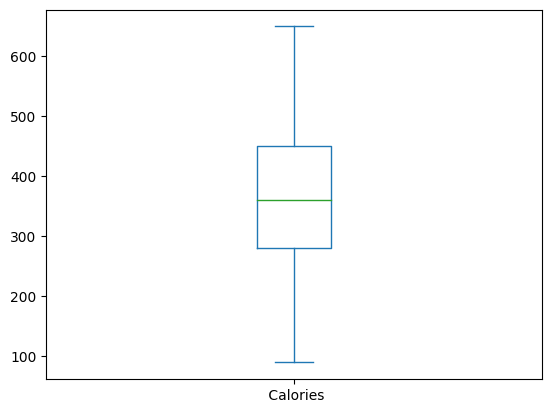

In [15]:
sb_food.plot(y = ' Calories', kind = 'box')

<AxesSubplot: >

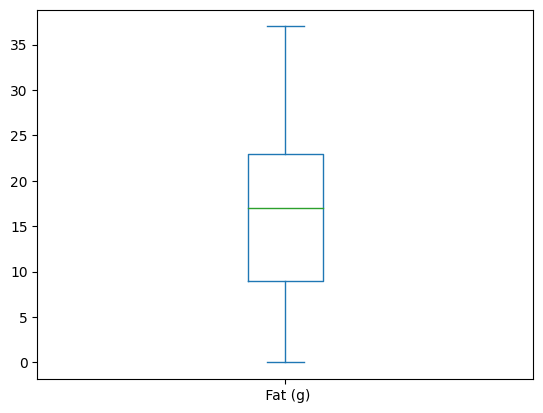

In [16]:
sb_food.plot(y = ' Fat (g)', kind = 'box')

<AxesSubplot: >

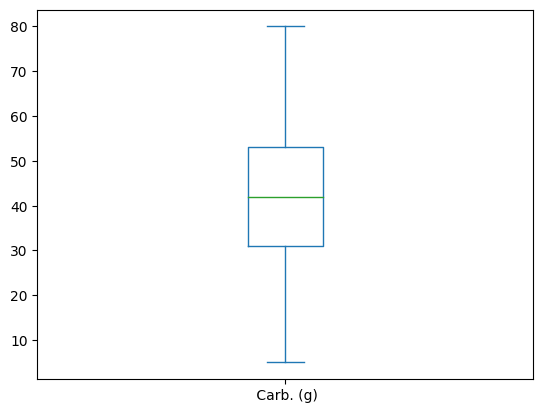

In [17]:
sb_food.plot(y = ' Carb. (g)', kind = 'box')

<AxesSubplot: >

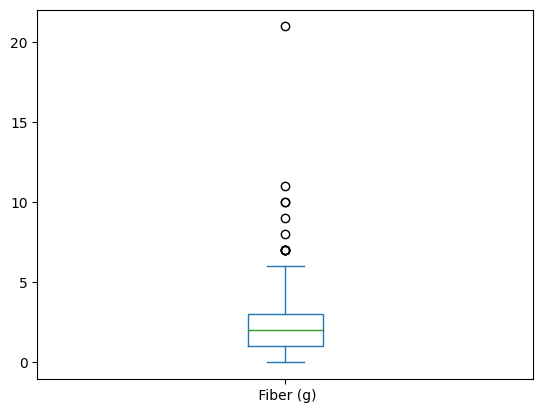

In [18]:
sb_food.plot(y = ' Fiber (g)', kind = 'box')

<AxesSubplot: >

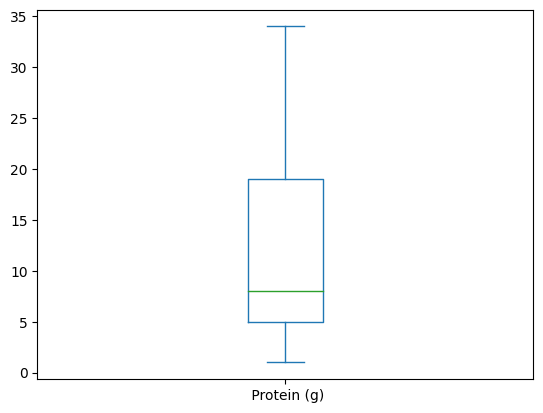

In [19]:
sb_food.plot(y = ' Protein (g)', kind = 'box')

#### Drinks Data

In [20]:
sb_drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

# Analysis

### Connotation/Perception of Each Food Name and Correlation to Nutrition

In [21]:
import nltk
from nltk.sentiment import vader
nltk.download('vader_lexicon')
nltk.download('stopwords')
sia = vader.SentimentIntensityAnalyzer()

nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

from nltk.tokenize import sent_tokenize, word_tokenize


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [22]:
def getSentiment(item):
    return sia.polarity_scores(item)['compound']

In [23]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

def getOpinionScore(item):
    words = nltk.word_tokenize(item.lower())

    num_positive = sum(1 for word in words if word in positive_words)
    num_negative = sum(1 for word in words if word in negative_words)

    opinion_score = num_positive - num_negative

    return opinion_score

#### Starbucks Food Items

In [24]:
sb_food['Sentiment'] = sb_food['Item'].apply(getSentiment)
sb_food['Sentiment'].describe()

count    113.000000
mean       0.019035
std        0.087896
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.510600
Name: Sentiment, dtype: float64

In [25]:
sb_food['Opinion'] = sb_food['Item'].apply(getOpinionScore)
sb_food['Opinion'].describe()

count    113.000000
mean       0.035398
std        0.351761
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Opinion, dtype: float64

array([[<AxesSubplot: title={'center': ' Calories'}>,
        <AxesSubplot: title={'center': ' Fat (g)'}>],
       [<AxesSubplot: title={'center': ' Carb. (g)'}>, <AxesSubplot: >]],
      dtype=object)

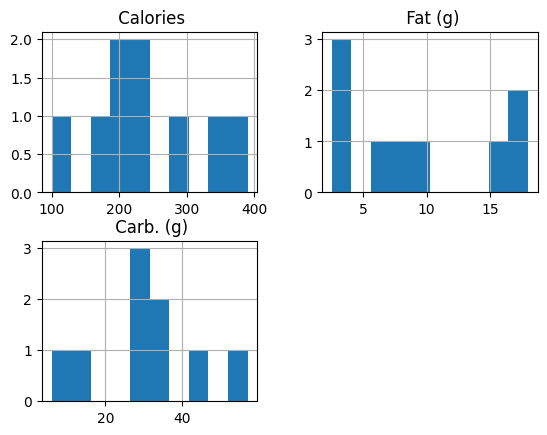

In [26]:
sb_food.loc[sb_food['Opinion']>0, [' Calories', ' Fat (g)', ' Carb. (g)']].hist()

#### Starbucks Drinks Items

In [27]:
sb_drinks['Sentiment'] = sb_drinks['Beverage'].apply(getSentiment)
sb_drinks['Sentiment'].describe()

count    242.000000
mean      -0.001914
std        0.012029
min       -0.077200
25%        0.000000
50%        0.000000
75%        0.000000
max        0.000000
Name: Sentiment, dtype: float64

In [28]:
sb_drinks['Opinion'] = sb_drinks['Beverage'].apply(getOpinionScore)
sb_drinks['Opinion'].describe()

count    242.000000
mean       0.107438
std        0.359844
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Opinion, dtype: float64

array([[<AxesSubplot: title={'center': 'Calories'}>]], dtype=object)

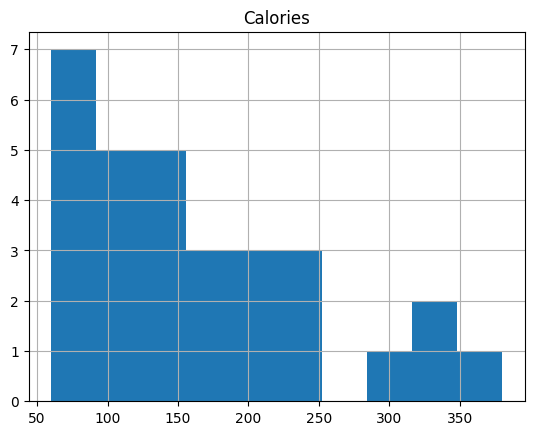

In [29]:
sb_drinks.loc[sb_drinks['Opinion']>0, ['Calories']].hist(bins = 10)

array([[<AxesSubplot: title={'center': 'Calories'}>]], dtype=object)

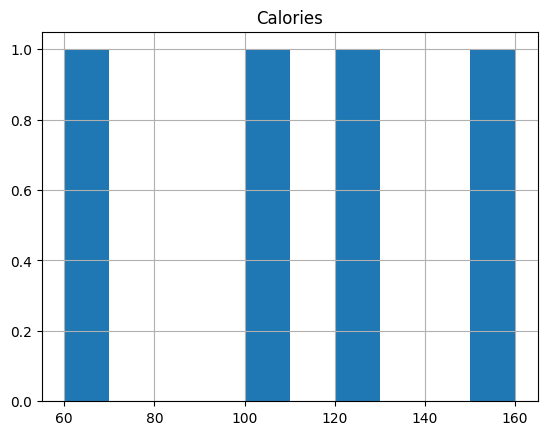

In [30]:
sb_drinks.loc[sb_drinks['Opinion']<0, ['Calories']].hist()

#### Limitations of Results 

- Discuss why SIA and Opinion Lexicon didn't work
    - Words were neutral, and not enough context to create a sentiment
- Discuss limited analysis of available data
    - Not enough data points to draw conclusion
    - Unequal amounts of "positive" versus "negative food items
- Discuss future studies 
    - Make a set of positive/negative list specifically from the food health perspective


### Frequency of Sounds (Letters) in Product Names and Correlation to Nutrition

In [31]:
def letterFrequency(item):
    frequencyScore = 0
    for letter in ['f', 's', 'i', 'e']:
        if letter in item.lower():
            frequencyScore = frequencyScore + 1
    for letter in ['b', 'd', 'g', 'o', 'u']:
        if letter in item.lower():
            frequencyScore = frequencyScore - 1
    if frequencyScore > 0 :
      phonemicSounds = 'high'
    elif frequencyScore < 0:
      phonemicSounds = 'low'
    else:
      phonemicSounds = 'neutral'
    return phonemicSounds

#### Starbucks Food

In [38]:
sb_food['phonemicFrequency'] = sb_food['Item'].apply(letterFrequency)

0          low
1          low
2      neutral
3         high
4          low
        ...   
108    neutral
109        low
110    neutral
111    neutral
112    neutral
Name: phonemicFrequency, Length: 113, dtype: object

array([[<AxesSubplot: title={'center': ' Calories'}>,
        <AxesSubplot: title={'center': ' Fat (g)'}>],
       [<AxesSubplot: title={'center': ' Carb. (g)'}>, <AxesSubplot: >]],
      dtype=object)

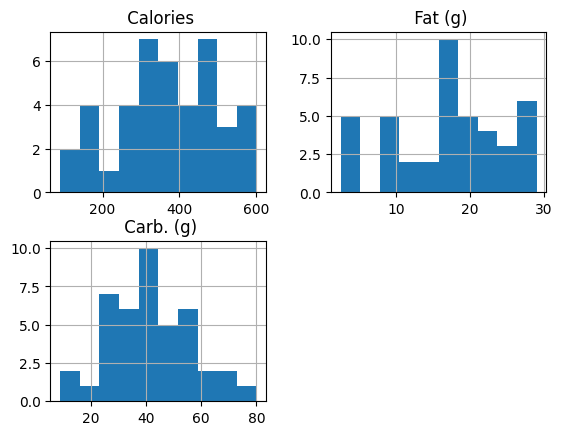

In [39]:
sb_food.loc[sb_food['phonemicFrequency']=='high', [' Calories', ' Fat (g)', ' Carb. (g)']].hist()

array([[<AxesSubplot: title={'center': ' Calories'}>,
        <AxesSubplot: title={'center': ' Fat (g)'}>],
       [<AxesSubplot: title={'center': ' Carb. (g)'}>, <AxesSubplot: >]],
      dtype=object)

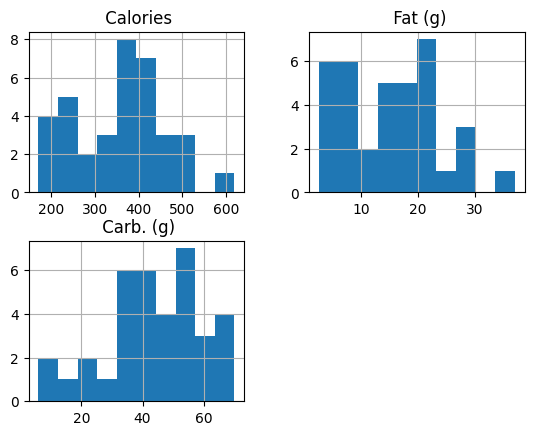

In [40]:
sb_food.loc[sb_food['phonemicFrequency']=='low', [' Calories', ' Fat (g)', ' Carb. (g)']].hist()

array([[<AxesSubplot: title={'center': ' Calories'}>,
        <AxesSubplot: title={'center': ' Fat (g)'}>],
       [<AxesSubplot: title={'center': ' Carb. (g)'}>, <AxesSubplot: >]],
      dtype=object)

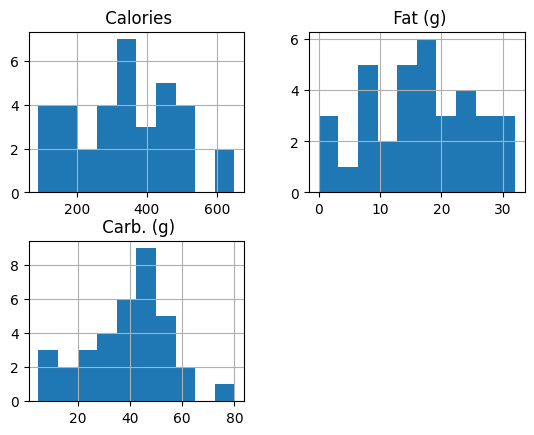

In [41]:
sb_food.loc[sb_food['phonemicFrequency']=='neutral', [' Calories', ' Fat (g)', ' Carb. (g)']].hist()

In [43]:
sb_drinks['phonemicFrequency'] = sb_drinks['Beverage'].apply(letterFrequency)

array([[<AxesSubplot: title={'center': 'Calories'}>]], dtype=object)

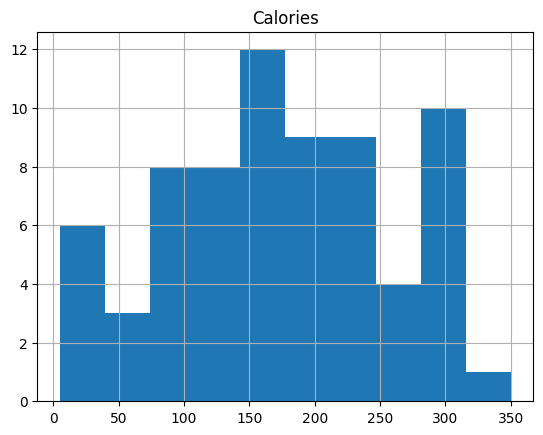

In [45]:
sb_drinks.loc[sb_drinks['phonemicFrequency']=='high', ['Calories']].hist()

array([[<AxesSubplot: title={'center': 'Calories'}>]], dtype=object)

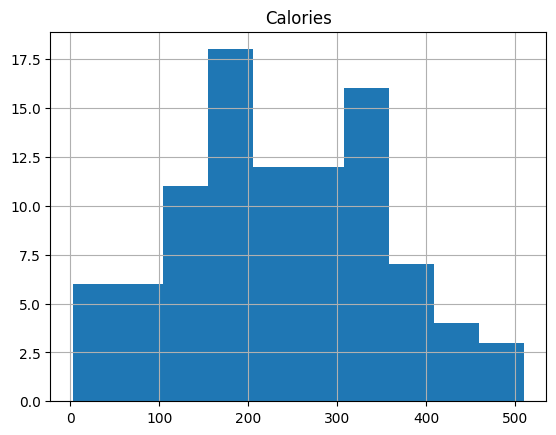

In [46]:
sb_drinks.loc[sb_drinks['phonemicFrequency']=='low', ['Calories']].hist()

#### Goals for this section
- plot histograms for high, neutral, and low phonemic Frequency on the same graph
- plot for additional categories beyond calories 
- explor different plot types  
- MAYBE conduct a network analysis to predict what the next item name will be? 

**I am still exploring the data and and looking for more trends and considering altering my research question to compare Starbucks and McDonalds Nutrition since most of my results look inconclusive**

#  McDonalds Data (if enough time)

In [33]:
mcd_menu = pd.read_csv('https://raw.githubusercontent.com/amywzhou/DH140/main/mcdonalds%20data/menu.csv')
mcd_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [34]:
unique_categories = mcd_menu['Category'].unique()
print(unique_categories)

['Breakfast' 'Beef & Pork' 'Chicken & Fish' 'Salads' 'Snacks & Sides'
 'Desserts' 'Beverages' 'Coffee & Tea' 'Smoothies & Shakes']


In [35]:
mcd_drinks = pd.concat([mcd_menu[mcd_menu['Category']== 'Beverages'], mcd_menu[mcd_menu['Category']== 'Coffee & Tea'], mcd_menu[mcd_menu['Category']== 'Smoothies & Shakes']])
mcd_food = pd.concat([mcd_menu[mcd_menu['Category']== 'Breakfast'], mcd_menu[mcd_menu['Category']== 'Beef & Pork'], mcd_menu[mcd_menu['Category']== 'Chicken & Fish'],mcd_menu[mcd_menu['Category']== 'Salads'],mcd_menu[mcd_menu['Category']== 'Snacks & Sides']])

In [36]:
mcd_food['Sentiment'] = mcd_food['Item'].apply(getSentiment)
mcd_food['Sentiment'].describe()

count    103.000000
mean       0.014728
std        0.086202
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.599400
Name: Sentiment, dtype: float64

array([[<AxesSubplot: title={'center': 'Calories'}>,
        <AxesSubplot: title={'center': 'Total Fat'}>],
       [<AxesSubplot: title={'center': 'Cholesterol'}>, <AxesSubplot: >]],
      dtype=object)

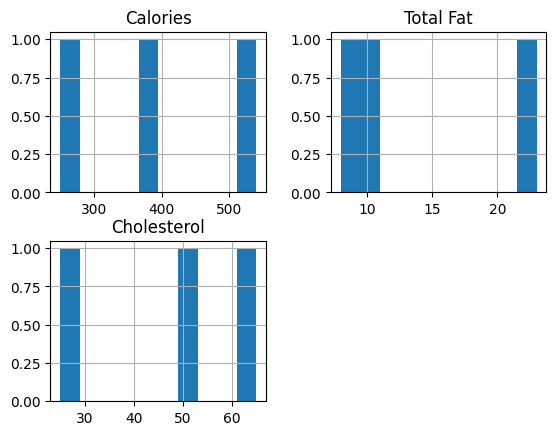

In [37]:
mcd_food.loc[mcd_food['Sentiment']>0, ['Calories', 'Total Fat', 'Cholesterol']].hist()